In [ ]:
import numpy
import matplotlib.pyplot as plt

In [82]:
def ReadData(fn, chromNum = -1):
    with open(fn) as f:
        mode = "u"#'t' for tree, 's' for segsites
        times = []
        spans = []
        counter = 0
        for line in f:
            if line.startswith("//"):
                mode = "t"
                continue
            elif line.startswith("@begin"):
                mode = "s"
                continue
            elif line.startswith("@end"):
                mode = "u"
                counter += 1
                if counter == chromNum:
                    break
                continue
            if mode == "t":
                s = line
                span = int(s[s.find("[")+1:s.find("]")])
                time = float(s[s.find(":")+1:s.find(",")])
                times.append(time)
                spans.append(span)
    return([times, spans])

In [141]:
path = "data_std_migr_same1"
path = "test_hmm"
f1 = path+"/sim_coal_rate1000.ms"
f2 = path+"/sim_std_same.ms"
times1, trackts1 = ReadData(f1, 500)
times2, trackts2 = ReadData(f2, 500)
print("Number of trees")
print(len(times1), "\t", len(times2))
print("Time stats")
print(numpy.mean(times1), "\t", numpy.mean(times2))
print(numpy.std(times1), "\t", numpy.std(times2))
print("Trackt length stats")
print(numpy.mean(trackts1), "\t", numpy.mean(trackts2))
print(numpy.std(trackts1), "\t", numpy.std(trackts2))

Number of trees
961422 	 1052935
Time stats
1.40454974142 	 1.44855716136
0.799016961562 	 0.782607614746
Trackt length stats
1560.18897009 	 1424.58936212
6727.54774643 	 5416.28493911


In [124]:
maxval = -10000
tr1 = [v/1000 for v in trackts1 if maxval < 0 or v < maxval]
print(len(trackts1), "\t", len(tr1))
tr2 = [v/1000 for v in trackts2 if maxval < 0 or v < maxval]
print(len(trackts2), "\t", len(tr2))

193751 	 193751
209624 	 209624


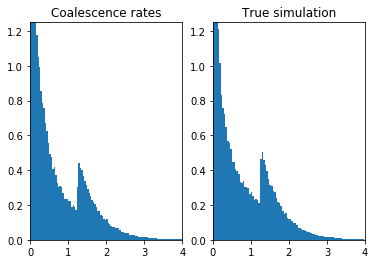

In [135]:
xmax=4
ymax=1.25

plt.figure(1)
plt.subplot(121)
axes = plt.gca()
axes.set_xlim([0,xmax])
axes.set_ylim([0,ymax])
plt.hist(times1, bins=200, weights=tr1, normed=True)
plt.title("Coalescence rates")
plt.subplot(122)
axes = plt.gca()
axes.set_xlim([0,xmax])
axes.set_ylim([0,ymax])
plt.hist(times2, bins=200, weights=tr2, normed=True)
plt.title("True simulation")
plt.show()

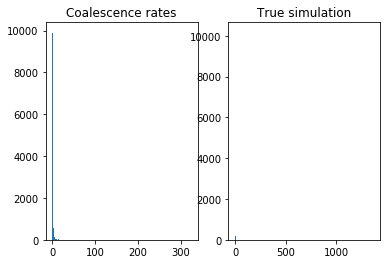

In [136]:
plt.figure(2)
plt.subplot(121)
#axes = plt.gca()
#axes.set_xlim([0,xmax])
#axes.set_ylim([0,ymax])
plt.hist(tr1, bins='auto')
plt.title("Coalescence rates")
plt.subplot(122)
#axes = plt.gca()
#axes.set_xlim([0,xmax])
#axes.set_ylim([0,ymax])
plt.hist(tr2, bins='auto')
plt.title("True simulation")
plt.show()

In [79]:
timeHist = numpy.histogram(times)
print(timeHist[0:10])
print(len(timeHist))

(array([210638, 133174, 107338,  33802,   9785,   2916,    779,    197,
           52,      8]), array([  7.20000000e-04,   7.43230000e-01,   1.48574000e+00,
         2.22825000e+00,   2.97076000e+00,   3.71327000e+00,
         4.45578000e+00,   5.19829000e+00,   5.94080000e+00,
         6.68331000e+00,   7.42582000e+00]))
2


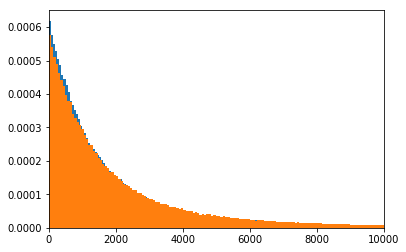

In [142]:
maxval = 100000
tr1 = [trackts1[i] for i in range(len(times1)) if times1[i] < 1.25 and trackts1[i] < maxval]
tr2 = [trackts2[i] for i in range(len(times2)) if times2[i] < 1.25 and trackts2[i] < maxval]
plt.figure(2)
axes = plt.gca()
axes.set_xlim([0,10000])
plt.hist(tr2, bins='auto', normed=True)
plt.hist(tr1, bins='auto', normed=True)
plt.show()

In [133]:
import numpy
numpy.version.version

'1.13.1'